<a href="https://colab.research.google.com/github/falawar7/AAI_635O/blob/main/Week1/FE_W1_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective:
The goal of this exercise is to predict missing ratings in the Rating.csv dataset by iteratively updating missing values using regression models like decision trees or neural networks.

# Dataset Details:
The dataset [Download here](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database) contains the following columns:

user_id: A randomly generated user ID (non-identifiable).
anime_id: The ID of the anime rated by the user.
rating: The rating the user assigned to the anime (range 1-10) or -1 if the user watched the anime but didn’t provide a rating.

# **# Steps for the Exercise:**

# 1. Data Preparation:
Load and Explore the Data:

Load the dataset into a Pandas DataFrame.
Explore the data to understand the structure, missing values (rating = -1), and general distribution.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/Othercomputers/THINKPAD-T14/AI/Reommender_System/Week1/Datasets/rating.csv')
print(data.head())
missing_data = data[data['rating'].isin([-1, None])]
print("Missing data:\n", missing_data)

   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1
Missing data:
          user_id  anime_id  rating
0              1        20      -1
1              1        24      -1
2              1        79      -1
3              1       226      -1
4              1       241      -1
...          ...       ...     ...
7813628    73515      2385      -1
7813629    73515      2386      -1
7813631    73515      2490      -1
7813635    73515      2680      -1
7813668    73515      5252      -1

[1476496 rows x 3 columns]


In [4]:
data['rating'].sum()

np.int64(48007831)

In [5]:
(data['rating'] == -1).sum()

np.int64(1476496)

# 2. Regression-Based Imputation (Iterative Approach):
Setting Up the Regression Model:

For simplicity, you can use a decision tree regression model to predict the missing values.
Create a feature matrix (X) and target vector (y), where X consists of user_id, anime_id, and any other useful features (like user averages), and y is the rating.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Feature Engineering: Add user-based averages or anime-based averages
data['user_avg_rating'] = data.groupby('user_id')['rating'].transform('mean')
data['anime_avg_rating'] = data.groupby('anime_id')['rating'].transform('mean')

# Filter out missing data (where rating == -1, treated as missing)
train_data = data[data['rating'] != -1]

# Features: user_id, anime_id, user_avg_rating, anime_avg_rating
X = train_data[['user_id', 'anime_id', 'user_avg_rating', 'anime_avg_rating']]
y=  train_data['rating']

# Train-test split (to ensure good model performance evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Regression Model (Decision Tree in this case):

In [7]:
# Train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
score = model.score(X_test, y_test)
print(f"Model R-squared score: {score}")

Model R-squared score: -0.25586300736568823


In [16]:
# Print some basic information about the model
print(model)

# Access specific attributes like feature importances
print(f"Feature Importances: {model.feature_importances_}")

DecisionTreeRegressor(random_state=42)
Feature Importances: [0.24069143 0.1167265  0.38482428 0.25775779]


In [10]:
print(model)

DecisionTreeRegressor(random_state=42)


Text(0, 0.5, 'Predicted Ratings')

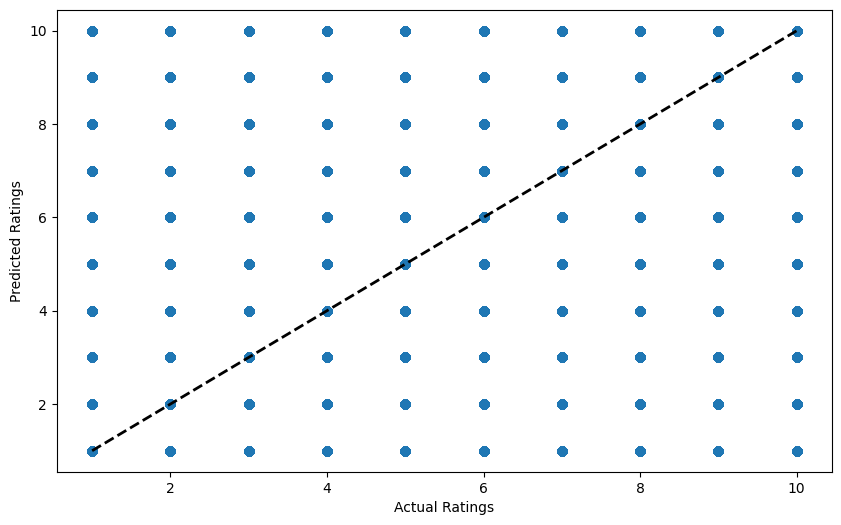

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

In [12]:
(data['rating'] == -1).sum()

np.int64(1476496)

# 4. Impute Missing Values Using the Trained Model:

For each missing rating, predict it using the trained regression model.


In [20]:
data.head()

,user_id,anime_id,rating,user_avg_rating,anime_avg_rating
0,1,20,8,-0.712418,6.571726
1,1,24,5,-0.712418,6.724172
2,1,79,10,-0.712418,6.053712
3,1,226,9,-0.712418,6.753508
4,1,241,10,-0.712418,5.385646


In [14]:
# Now, predict ratings for the missing data (where rating == -1 or NaN)
missing_data = data[data['rating'].isin([-1, None])]  # Treat both -1 and NaN as missing

# Predict the missing ratings
predicted_ratings = model.predict(missing_data[['user_id', 'anime_id', 'user_avg_rating', 'anime_avg_rating']])


# Update the DataFrame with the predicted ratings for missing values
data.loc[missing_data.index, 'rating'] = predicted_ratings

# Output the updated DataFrame
print("\nUpdated DataFrame with predicted ratings:\n", data)


Updated DataFrame with predicted ratings:
          user_id  anime_id  rating  user_avg_rating  anime_avg_rating
0              1        20       8        -0.712418          6.571726
1              1        24       5        -0.712418          6.724172
2              1        79      10        -0.712418          6.053712
3              1       226       9        -0.712418          6.753508
4              1       241      10        -0.712418          5.385646
...          ...       ...     ...              ...               ...
7813732    73515     16512       7         7.719388          5.747432
7813733    73515     17187       9         7.719388          6.075390
7813734    73515     22145      10         7.719388          6.153499
7813735    73516       790       9         9.000000          6.929162
7813736    73516      8074       9         9.000000          6.324127

[7813737 rows x 5 columns]


# 5. Repeat the Process:

After updating the ratings, you can re-train the model with the newly imputed data and predict again, improving the quality of the imputed values.

In [ ]:
# Iterative imputation process
max_iterations = 5  # Set the number of iterations for improving predictions

for i in range(max_iterations):
    # Now, predict ratings for the missing data (where rating == -1 or NaN)
    predicted_ratings= data[data['rating'].isin([-1, None])]  # Treat both -1 and NaN as missing

    # Predict the missing ratings
    X_missing = missing_data[['user_id', 'anime_id', 'user_avg_rating', 'anime_avg_rating']]
    predicted_ratings = model.predict(X_missing)


    # Update the DataFrame with the predicted ratings for missing values
    data.loc[missing_data.index, 'rating'] = predicted_ratings

    # Re-train the model with the updated data (including the imputed values)
    X = data[['user_id', 'anime_id', 'user_avg_rating', 'anime_avg_rating']]
    y = data['rating']


    # Re-train the model on the updated data
    model.fit(X, y)


In [ ]:
# After completing the iterations, print the final updated values
print("\nFinal Updated DataFrame with Imputed Ratings:")
print(data[['user_id', 'anime_id', 'rating']].head())  # Print the top rows with updated ratings for review


Final Updated DataFrame with Imputed Ratings:
   user_id  anime_id  rating
0        1        20       8
1        1        24       5
2        1        79      10
3        1       226       9
4        1       241      10


# 6. Evaluation:
Measure Accuracy:

After filling in missing ratings, evaluate how well the model performs on the imputed ratings.
Use a root mean squared error (RMSE) or mean absolute error (MAE) to measure prediction accuracy.

In [ ]:
data.head()

,user_id,anime_id,rating,user_avg_rating,anime_avg_rating
0,1,20,8,-0.712418,6.571726
1,1,24,5,-0.712418,6.724172
2,1,79,10,-0.712418,6.053712
3,1,226,9,-0.712418,6.753508
4,1,241,10,-0.712418,5.385646


In [ ]:
data['rating'].isnull().sum()

np.int64(0)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print(f"RMSE of model: {rmse}")

RMSE of model: 0.0013323735804715818


In [ ]:
mae= mean_absolute_error(y_test, model.predict(X_test))
print(f"MAE of model: {mae}")

MAE of model: 1.1834795719591084e-06


Text(0, 0.5, 'Predicted Ratings')

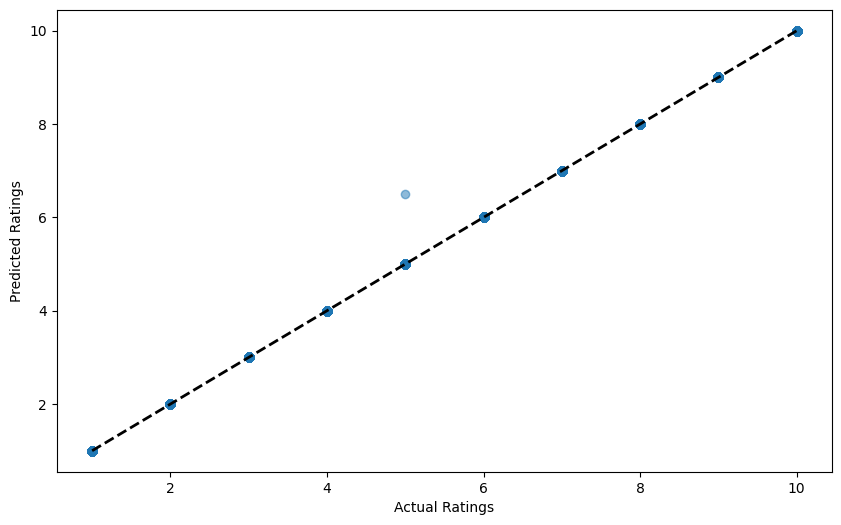

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')